
# wFunction

Ce petit module python a pour objectif de créer un circuit quantique préparant les qubits dans une distribution de votre choix.

Pour ce faire, une transformation linéaire est appliquée au domaine de la distribution pour l'amener dans le domaine binaire $[0,2^n-1]$ ou $n$ est le nombre de qubits utilisé. La fonction d'onde préparée est donc $\sum_i f(i)|i \rangle$ ou $i$ est l'état des qubits lorsque lue en binaire et $f(i)$ est la distribution cible sur le domaine binaire évalué à $i$.

 Les fonctions du module normalisent automatiquement la distribution.

## Installation

### Quimb

wFunction dépend de la bibliothèque de manipulation de tenseur Quimb.
Malheureusement, il est possible que la version de quimb disponible sur pypa ne soit pas suffisamment à jour. Si c'est le cas, utilisez la commande suivante: 
    
    pip install git+https://github.com/jcmgray/quimb.git

### Conda    

L'installation avec conda n'est pas testée. Comme il s'agit d'un projet purement en python, il devrait fonctionner sans problème.

### Installation

Télécharger le dépôt git, puis à partir du dossier du projet, saisissez la commande
    
    pip install ./
    


## Utilisation

Dans la cellule suivante, on importe wFunction, qiskit et numpy et on définit la distribution. Noté que la distribution dans cet exemple à deux paramètres: mu et sigma. Nous allons devoir les fixer avant de donner cette fonction à wFunction.

In [13]:
%%capture
import wFunction as wf
import qiskit as qs
import numpy as np
from scipy.stats import lognorm as scplog
def lognorm(x,mu,sigma):
    return scplog.pdf(np.exp(-mu)*x,sigma )

Une fois la fonction définie, on crée un registre quantique avec le nombre de qubits désiré, et on appelle *Generate_f_circuit*.
Noté qu'on fixe les paramètres de la distribution en la plaçant dans un lambda.
Les arguments sont: la distribution, la précision de la discrétisation intermédiaire de la fonction, la fidélité du circuit, le nombre de qubits, le domaine de la fonction, le registre quantique du circuit, le nombre maximal de couches du circuit et, finalement, le nom du circuit.

In [14]:
%%capture
nqbit = 4
threeqb = qs.QuantumRegister(nqbit)
circ = wf.Generate_f_circuit(lambda x:lognorm(x,1,1),MPS_precision=1e-14,Gate_precision=1e-2,nqbit=nqbit,domain=[0,7],register=threeqb,Nlayer=500,name="lognormal")



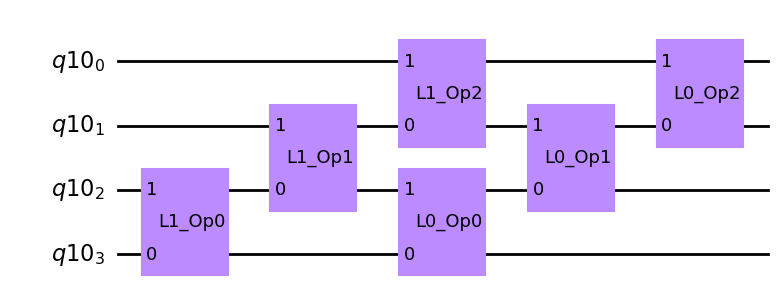

In [15]:
circ.draw('mpl')

Finalement, on peut observer le résultat d'une simulation.

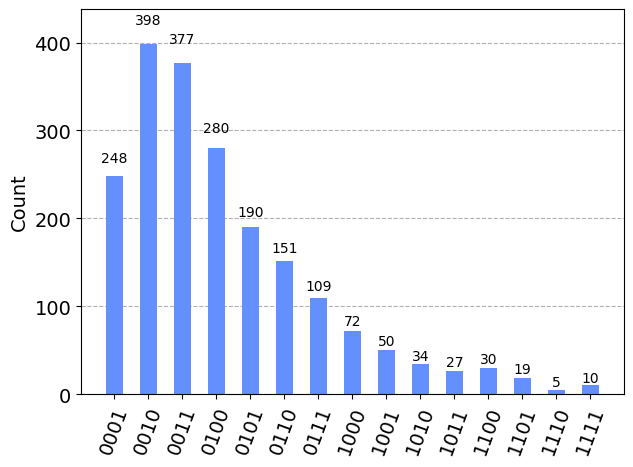

In [16]:
from qiskit import transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram

circ.measure_all()
simulator = QasmSimulator()
compiled_circuit = transpile(circ, simulator)
shots = 2000
job = simulator.run(compiled_circuit, shots=shots)
result = job.result()
counts = result.get_counts(compiled_circuit)
plot_histogram(counts)


Si l’on désire plutôt que les probabilités des états correspondent à une distribution particulière, il faut fournir la racine carrée de la distribution.

error:  0.20961584702731437
error:  0.008291564420607056


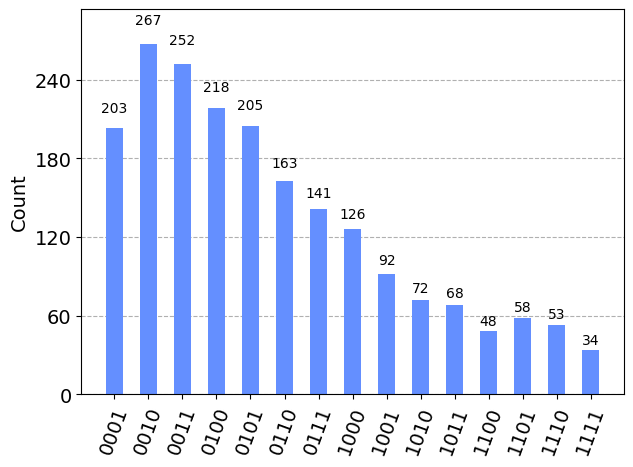

In [20]:
threeqb = qs.QuantumRegister(nqbit)
circ = wf.Generate_f_circuit(lambda x:np.sqrt(lognorm(x,1,1)),MPS_precision=1e-14,Gate_precision=1e-2,nqbit=nqbit,domain=[0,7],register=threeqb,Nlayer=20,name="lognormal")
circ.measure_all()
simulator = QasmSimulator()
compiled_circuit = transpile(circ, simulator)
shots = 2000
job = simulator.run(compiled_circuit, shots=shots)
result = job.result()
counts = result.get_counts(compiled_circuit)
plot_histogram(counts)